In [1]:
from bs4 import BeautifulSoup as soup
import requests as req
import pandas as pd

In [2]:
#List of Movies Genres
movies_genre = ['Action','Adventure','Animation','Biography','Comedy','Crime','Drama','Family','Fantasy'
               ,'History','Music','Musical','Mystery','Romance','Sci-Fi','Sport','Thriller','War','Western']

# Starting Link
main_url = 'https://www.imdb.com/search/title?title_type=feature&num_votes=25000,&genres='

#Create the links for every genre of movie
for genre in movies_genre:
    #create Link
    link = main_url+genre+'&start='
    base_url = req.get(link)
    Content = base_url.content
    #convert into the soup
    page = soup(Content,'html.parser')
    #find the number of movies
    div = page.find('div',{'class':'desc'})
    txt = div.find('span').text
    txt_str = txt.split()
    #convert string to inter 
    if(len(txt_str[2])>4):
        page_number = txt_str[2]
        page_number = page_number[0]+page_number[2:]
    else:
        page_number = txt_str[2]
    #Find the number of pages for every genre of movie
    total_pages = int(int(page_number)/50)
    #print(genre,total_pages," Number of pages were found")
    
    #DataSet for the movies
    DataSet = []
    p = 0
    page_num = 1
    while(p<total_pages):
        next_link = main_url+str(page_num)
        next_page = req.get(next_link)
        Cont=next_page.content
        soup_page=soup(Cont,"html.parser")
        movies_container=soup_page.find_all("div",{"class":"lister-item-content"})
        number_of_moives = len(movies_container)
        i = 0
        while(i<number_of_moives):
            movies = {}
            m = movies_container[i]
            try:
                movies['Name'] = m.find(class_='lister-item-header').get_text(strip=True)
            except AttributeError:
                moves['Name'] = None
            try:
                movies['Certificate'] = m.find(class_='certificate').get_text(strip=True)
            except AttributeError:
                movies['Certificate'] = None
            try:
                movies['Runtime'] = m.find(class_='runtime').get_text(strip=True)
            except AttributeError:
                movies['Runtime'] = None
            try:
                movies['Genre'] = m.find(class_='genre').get_text(strip=True)
            except AttributeError:
                movies['Genre'] = None
            try:
                movies['Rating'] = m.find(class_='inline-block ratings-imdb-rating').get_text(strip=True)
            except AttributeError:
                movies['Rating'] = None
            try:
                movies['Metascore'] = m.find(class_='inline-block ratings-metascore').get_text(strip=True)
            except AttributeError:
                movies['Metascore'] = None
            try:
                votes_and_gross = m.find(class_='sort-num_votes-visible').get_text(strip=True)
                v= votes_and_gross.split('|')
                n = v[0].split(':')#
                movies['Votes'] = n[1]
            except AttributeError:
                movies['Votes'] = None
            i = i + 1
            DataSet.append(movies)
        page_num = page_num+50
        p = p+1
    dataframe = pd.DataFrame(DataSet)
    dataframe['Name'].iloc[0:9] = dataframe['Name'].iloc[0:9].astype(str).str[2:]
    dataframe['Name'].iloc[9:] = dataframe['Name'].iloc[9:].astype(str).str[3:]
    dataframe['Metascore'] = dataframe['Metascore'].astype(str).str[0:2]
    print(dataframe.shape)
    col_names = ["Name","Certificate",'Runtime',"Genre","Rating",'Metascore',"Votes"]
    dataframe = dataframe.reindex(columns=col_names)
    dataframe.to_csv(genre+".csv",index=False)

(1250, 7)
(1000, 7)
(250, 7)
(300, 7)
(1650, 7)
(950, 7)
(2450, 7)
(450, 7)
(600, 7)
(150, 7)
(100, 7)
(100, 7)
(600, 7)
(950, 7)
(650, 7)
(150, 7)
(1600, 7)
(200, 7)
(50, 7)


In [27]:
action = pd.read_csv('Action.csv')
action.head()

,Name,Certificate,Runtime,Genre,Rating,Metascore,Votes
0,Captain Marvel(2019),PG-13,124 min,"Action, Adventure, Sci-Fi",7.1,64,"132,921"
1,Bohemian Rhapsody(2018),PG-13,134 min,"Biography, Drama, Music",8.1,49,"297,634"
2,Green Book(2018),PG-13,130 min,"Biography, Comedy, Drama",8.3,69,"137,448"
3,Alita: Battle Angel(2019),PG-13,122 min,"Action, Adventure, Romance",7.6,54,"72,335"
4,A Star Is Born(2018),R,136 min,"Drama, Music, Romance",7.8,88,"214,766"


In [28]:
action[['Certificate','Name']].groupby('Certificate').count()

,Name
Certificate,
PG,150
PG-13,700
R,375


Text(0, 0.5, 'Title Count')

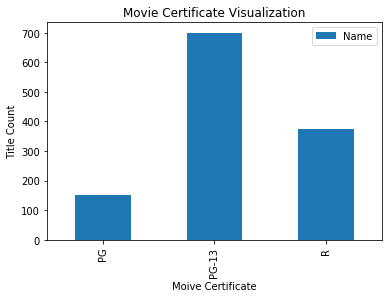

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
action[['Certificate','Name']].groupby('Certificate').count().plot(kind='bar', title='Movie Certificate Visualization')
plt.xlabel('Moive Certificate')
plt.ylabel('Title Count')